In [2]:
import pandas as pd
import pickle as pkl
import networkx as nx
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from multiprocessing import Pool
import seaborn as sns

## Building a graph

In [5]:
with open ('data/drug_target_interactions.pkl', 'rb') as f:
    drug_target_interactions = pkl.load(f)

In [6]:
drug_target_interactions.head()

drug_cas  drug_id  drug_name target_actions  \
0  138068-37-8  DB00001  Lepirudin    [inhibitor]   
1  205923-56-4  DB00002  Cetuximab   [antagonist]   
2  205923-56-4  DB00002  Cetuximab            NaN   
3  205923-56-4  DB00002  Cetuximab            NaN   
4  205923-56-4  DB00002  Cetuximab            NaN   

                                        target_amino  \
0  >lcl|BSEQ0016004|Prothrombin\nMAHVRGLQLPGCLALA...   
1  >lcl|BSEQ0001530|Epidermal growth factor recep...   
2  >lcl|BSEQ0010635|Low affinity immunoglobulin g...   
3  >lcl|BSEQ0011518|Complement C1r subcomponent\n...   
4  >lcl|BSEQ0016678|Complement C1q subcomponent s...   

                                         target_gene  target_id  \
0  >lcl|BSEQ0016005|Prothrombin (F2)\nATGGCGCACGT...  BE0000048   
1  >lcl|BSEQ0019007|Epidermal growth factor recep...  BE0000767   
2  >lcl|BSEQ0010636|Low affinity immunoglobulin g...  BE0000901   
3  >lcl|BSEQ0011519|Complement C1r subcomponent (...  BE0002093   
4  >lcl|BSEQ0016679|Complement C1q subcomponent s...  BE0002094   

                                         target_name target_organism  
0                                        Prothrombin           Human  
1                   Epidermal growth factor receptor           Human  
2  Low affinity immunoglobulin gamma Fc region re...           Human  
3                        Complement C1r subcomponent           Human  
4              Complement C1q subcomponent subunit A           Human

In [7]:
drug_target_interactions_graph = nx.from_pandas_edgelist(drug_target_interactions[['drug_id', 'target_id']],
                                                         source = 'drug_id', target = 'target_id',
                                                         edge_attr = True)

In [24]:
drug_target_interactions_graph

In [25]:
nx.is_connected(drug_target_interactions_graph)

False

## Seems like the graph is not fully connected. Inspecting smaller connected components

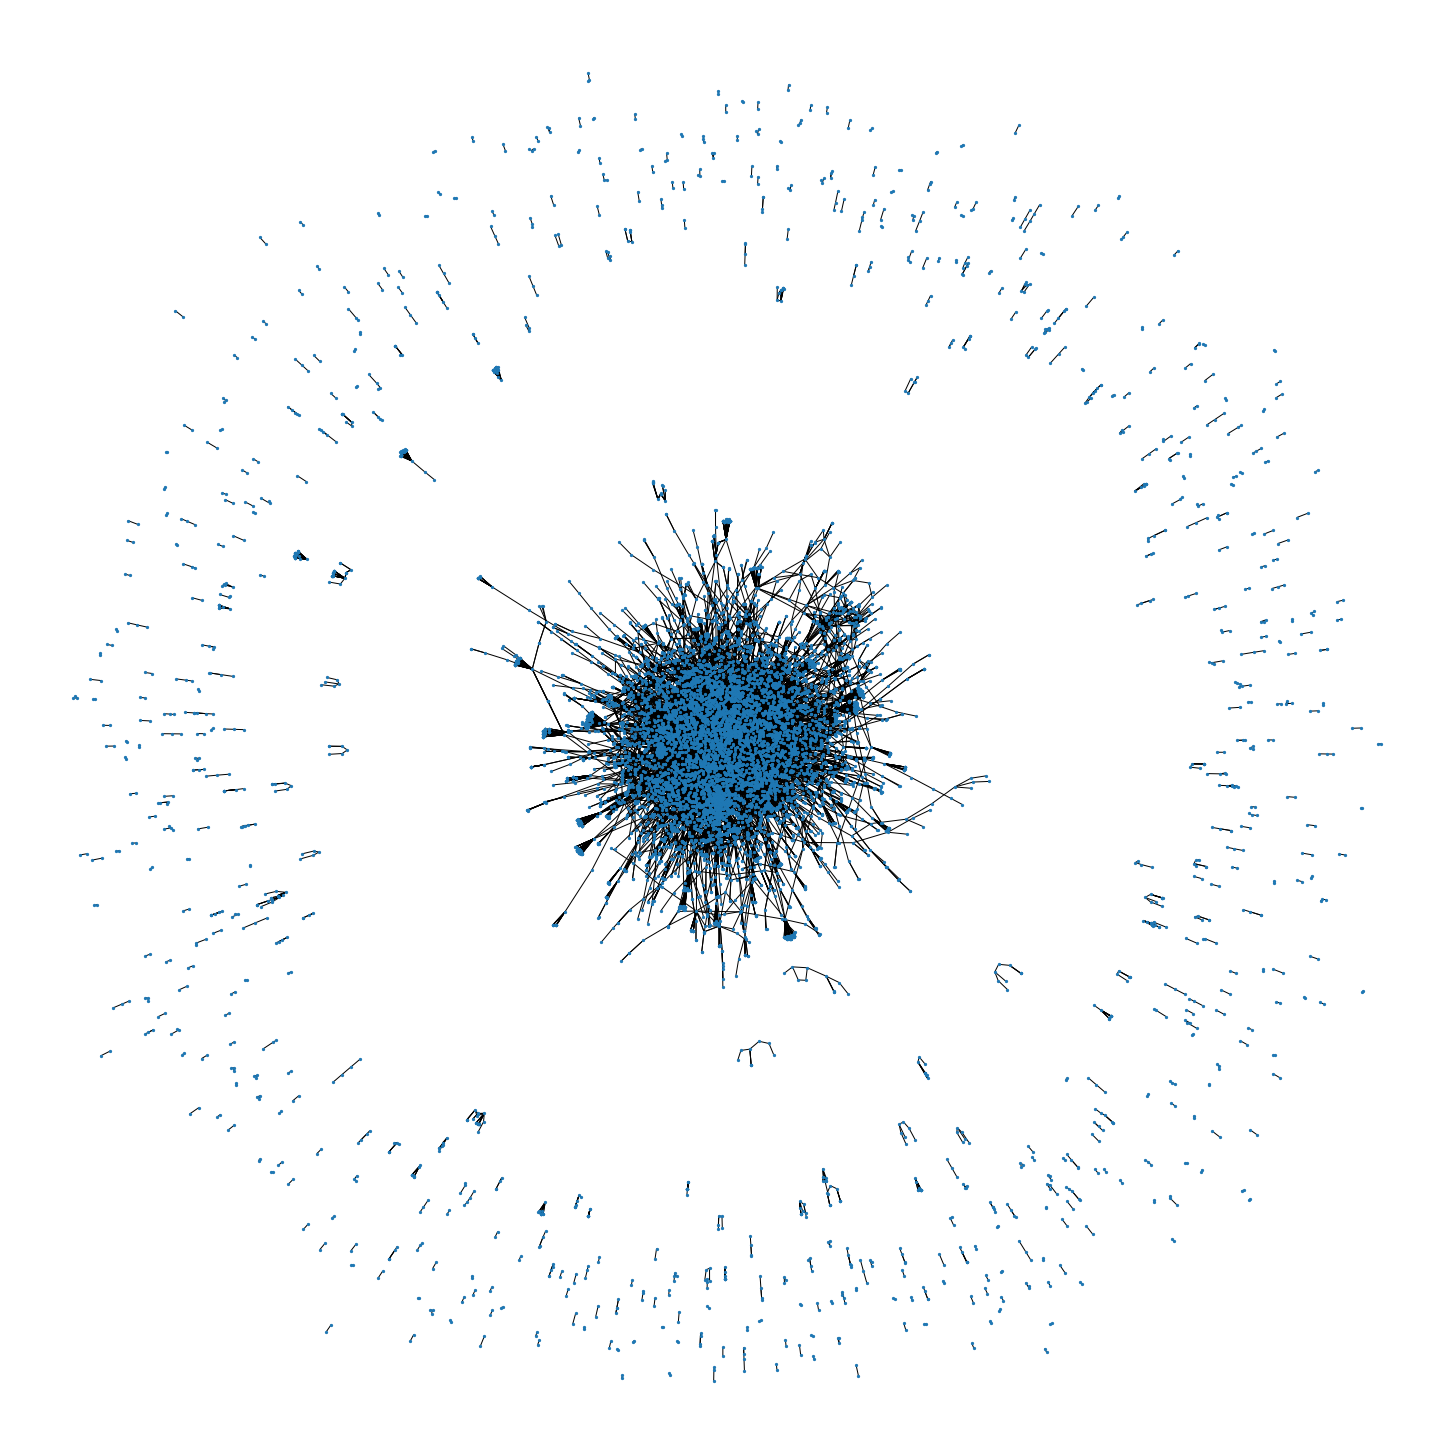

In [8]:
plt.figure(figsize = (20, 20))
nx.draw_spring(drug_target_interactions_graph, node_size = 5)

In [22]:
list(nx.connected_components(drug_target_interactions_graph))

[{'DB03766',
  'BE0003060',
  'DB07008',
  'DB00454',
  'BE0000813',
  'DB05092',
  'BE0003921',
  'DB07003',
  'BE0003286',
  'DB08204',
  'DB04294',
  'BE0003751',
  'DB11581',
  'DB03311',
  'DB00670',
  'DB07062',
  'BE0000626',
  'DB07967',
  'DB06788',
  'DB03535',
  'BE0003739',
  'BE0000945',
  'BE0000308',
  'DB08639',
  'DB02026',
  'BE0003321',
  'BE0004433',
  'DB04483',
  'BE0004426',
  'DB00399',
  'DB01085',
  'BE0003955',
  'DB00725',
  'DB03194',
  'DB04905',
  'DB09166',
  'DB04410',
  'BE0003737',
  'DB02108',
  'DB00610',
  'DB02796',
  'DB02053',
  'DB04657',
  'DB04606',
  'DB08426',
  'DB07220',
  'DB00149',
  'DB02623',
  'DB08284',
  'BE0001647',
  'DB00372',
  'DB05507',
  'DB02265',
  'DB13061',
  'DB05383',
  'DB02723',
  'DB00313',
  'BE0003064',
  'BE0004033',
  'DB07436',
  'DB01745',
  'DB02590',
  'DB07441',
  'BE0000195',
  'DB04405',
  'DB04108',
  'DB03361',
  'DB03832',
  'DB03512',
  'DB00495',
  'DB13164',
  'DB02068',
  'DB03467',
  'BE0003069',


<BarContainer object of 578 artists>

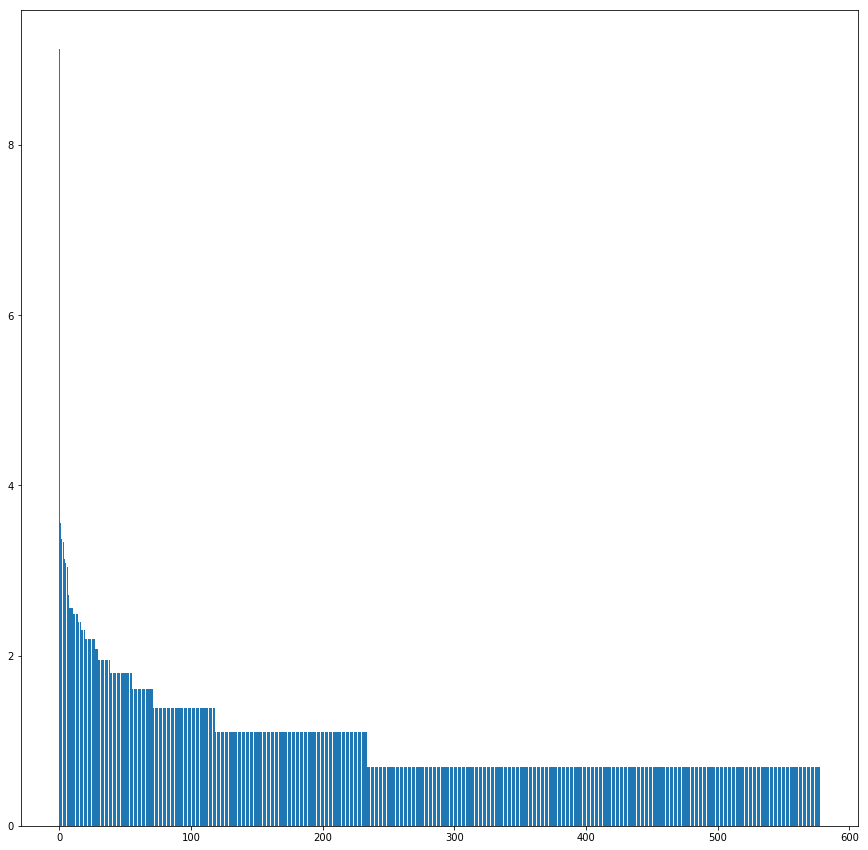

In [48]:
connect_components_list = [len(n) for n in nx.connected_components(drug_target_interactions_graph)]
plt.figure(figsize = (15, 15))
plt.bar(range(len(connect_components_list)), sorted(np.log(connect_components_list), reverse = True))

### Seems like there is one huge component and several smaller components. Taking a look at the largest component first

In [53]:
sorted(connect_components_list)

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [8]:
drug_target_interactions_major = list(nx.connected_component_subgraphs(drug_target_interactions_graph))[1]

In [9]:
len(drug_target_interactions_major)

9186

In [10]:
nx.is_connected(drug_target_interactions_major)

True

## Converting to NetworkX recommended bipartite format

In [11]:
bottom_nodes, top_nodes = bipartite.sets(drug_target_interactions_major)

In [12]:
[n for n in drug_target_interactions_major.nodes(data=True)]

[('DB02524', {}),
 ('DB11133', {}),
 ('DB09217', {}),
 ('DB07536', {}),
 ('BE0002707', {}),
 ('DB00208', {}),
 ('DB03986', {}),
 ('DB05785', {}),
 ('DB07716', {}),
 ('DB07567', {}),
 ('DB08584', {}),
 ('DB06103', {}),
 ('DB03660', {}),
 ('DB01003', {}),
 ('DB07676', {}),
 ('DB08761', {}),
 ('DB07786', {}),
 ('BE0000779', {}),
 ('DB01784', {}),
 ('DB04682', {}),
 ('BE0003857', {}),
 ('BE0000805', {}),
 ('DB01078', {}),
 ('DB01610', {}),
 ('DB04593', {}),
 ('DB07029', {}),
 ('DB03173', {}),
 ('DB04164', {}),
 ('DB00983', {}),
 ('BE0000774', {}),
 ('DB01852', {}),
 ('BE0001627', {}),
 ('BE0000581', {}),
 ('BE0001964', {}),
 ('DB08089', {}),
 ('BE0001634', {}),
 ('DB01955', {}),
 ('DB02196', {}),
 ('DB02164', {}),
 ('BE0002073', {}),
 ('BE0002664', {}),
 ('DB06414', {}),
 ('BE0000614', {}),
 ('BE0003046', {}),
 ('DB02772', {}),
 ('DB01701', {}),
 ('DB02296', {}),
 ('BE0000199', {}),
 ('DB07607', {}),
 ('DB00415', {}),
 ('DB04348', {}),
 ('DB08274', {}),
 ('DB02759', {}),
 ('DB00350', {}),


In [13]:
drugs_df = drug_target_interactions[['drug_id', 'drug_name', 'drug_cas']].drop_duplicates().set_index('drug_id')
targets_df = drug_target_interactions[['target_id',
                                     'target_amino', 'target_gene',
                                     'target_name']].drop_duplicates().set_index('target_id')



In [14]:
drugs_df['bipartite'] = 0
targets_df['bipartite'] = 1

In [15]:
nodes = drugs_df.to_dict('index')
nodes.update(targets_df.to_dict('index'))

In [16]:
nx.set_node_attributes(drug_target_interactions_major, nodes)

In [32]:
[v for i,v in drug_target_interactions_major.nodes(data = True)]

[{'bipartite': 0,
  'drug_cas': nan,
  'drug_name': '1-(4-Aminophenyl)-3,5-Dimethyl-1h-Pyrazole-4-Carboxylic Acid Ethyl Ester'},
 {'bipartite': 0, 'drug_cas': '29679-58-1', 'drug_name': 'Fenoprofen'},
 {'bipartite': 1,
  'target_amino': nan,
  'target_gene': nan,
  'target_name': 'Magnesium cation'},
 {'bipartite': 0,
  'drug_cas': nan,
  'drug_name': '[(3,7,11-TRIMETHYL-DODECA-2,6,10-TRIENYLOXYCARBAMOYL)-METHYL]-PHOSPHONIC ACID'},
 {'bipartite': 0,
  'drug_cas': nan,
  'drug_name': '5-chloro-N-{4-[(1R)-1,2-dihydroxyethyl]phenyl}-1H-indole-2-carboxamide'},
 {'bipartite': 1,
  'target_amino': '>lcl|BSEQ0010417|ADP/ATP translocase 1\nMGDHAWSFLKDFLAGGVAAAVSKTAVAPIERVKLLLQVQHASKQISAEKQYKGIIDCVVR\nIPKEQGFLSFWRGNLANVIRYFPTQALNFAFKDKYKQLFLGGVDRHKQFWRYFAGNLASG\nGAAGATSLCFVYPLDFARTRLAADVGKGAAQREFHGLGDCIIKIFKSDGLRGLYQGFNVS\nVQGIIIYRAAYFGVYDTAKGMLPDPKNVHIFVSWMIAQSVTAVAGLVSYPFDTVRRRMMM\nQSGRKGADIMYTGTVDCWRKIAKDEGAKAFFKGAWSNVLRGMGGAFVLVLYDEIKKYV',
  'target_gene': '>lcl|BSEQ0010418|ADP/ATP transloc

In [33]:
top_nodes = {n for n, d in drug_target_interactions_major.nodes(data=True) if 'DB' in n}
bottom_nodes = {n for n, d in drug_target_interactions_major.nodes(data=True) if 'DB' not in n}

In [34]:
bottom_nodes

{'BE0003424',
 'BE0004811',
 'BE0000599',
 'BE0000427',
 'BE0004157',
 'BE0003060',
 'BE0000813',
 'BE0004942',
 'BE0000130',
 'BE0003286',
 'BE0003921',
 'BE0002536',
 'BE0000478',
 'BE0000501',
 'BE0003751',
 'BE0004502',
 'BE0001945',
 'BE0002717',
 'BE0001943',
 'BE0000626',
 'BE0004814',
 'BE0008625',
 'BE0004742',
 'BE0000897',
 'BE0000471',
 'BE0002328',
 'BE0002987',
 'BE0003739',
 'BE0003970',
 'BE0000945',
 'BE0004230',
 'BE0003834',
 'BE0002563',
 'BE0002475',
 'BE0000895',
 'BE0000308',
 'BE0003024',
 'BE0003321',
 'BE0001342',
 'BE0004433',
 'BE0004426',
 'BE0000963',
 'BE0002835',
 'BE0003164',
 'BE0002529',
 'BE0000086',
 'BE0001093',
 'BE0004665',
 'BE0003955',
 'BE0001976',
 'BE0004380',
 'BE0001400',
 'BE0001764',
 'BE0001108',
 'BE0001617',
 'BE0000152',
 'BE0000269',
 'BE0003634',
 'BE0004057',
 'BE0001768',
 'BE0001333',
 'BE0004084',
 'BE0004674',
 'BE0003737',
 'BE0000081',
 'BE0004440',
 'BE0002390',
 'BE0000644',
 'BE0000360',
 'BE0003845',
 'BE0002125',
 'BE00

## Investigating the structure of the two partite(?)

In [35]:
closeness_centrality_list = nx.bipartite.closeness_centrality(drug_target_interactions_major, top_nodes)
closeness_centrality_df = pd.DataFrame.from_dict(closeness_centrality_list, orient = 'index')

In [36]:
closeness_centrality_df = closeness_centrality_df.sort_values(0)
closeness_centrality_drugs = pd.merge(closeness_centrality_df, drugs_df, left_index = True, right_index = True, how = 'inner')
closeness_centrality_targets = pd.merge(closeness_centrality_df, targets_df, left_index = True, right_index = True, how = 'inner')

In [37]:
closeness_centrality_drugs = closeness_centrality_drugs.rename(columns = {0:'closeness_centrality'})
closeness_centrality_targets = closeness_centrality_targets.rename(columns = {0:'closeness_centrality'})

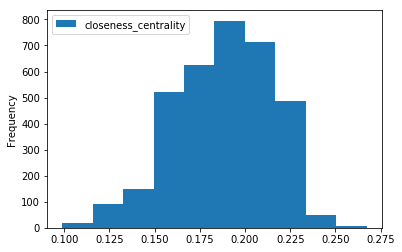

In [38]:
closeness_centrality_targets[['closeness_centrality']].plot.hist('closeness_centrality')

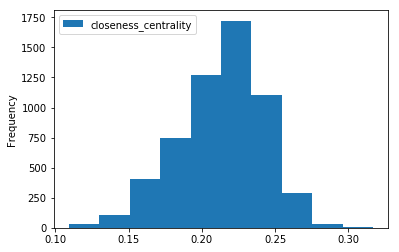

In [39]:
closeness_centrality_drugs[['closeness_centrality']].plot.hist('closeness_centrality')

#### Sanity Check: Drugs with lower rank are very esoteric and ones with high scores are common molecules

In [21]:
## Serialized Implementation

v = []
u = []
path_delta = []

for edge in tqdm(drug_target_interactions_major.edges()):
    
    drug_target_interactions_major_temp = drug_target_interactions_major.copy()
    drug_target_interactions_major_temp.remove_edge(*edge)
    
    try:
        path_delta.append(nx.shortest_path(drug_target_interactions_major_temp, edge[0], edge[1]))
    except nx.NetworkXNoPath:
        path_delta.append(0)
    
    v.append(edge[0])
    u.append(edge[1])
    
    break

In [17]:
## Parallel implementation

def get_shortest_path_delta(args):
    
    drug_target_interactions_major = args[0]
    edge = args[1]
    
    drug_target_interactions_major_temp = drug_target_interactions_major.copy()
    drug_target_interactions_major_temp.remove_edge(*edge)
    
    try:
        return [nx.shortest_path(drug_target_interactions_major_temp,
                                edge[0], edge[1]), edge[0], edge[1]]
    except nx.NetworkXNoPath:
        return [[0],edge[0], edge[1]]

    
p = Pool(11)
shortest_path_delta = p.map(get_shortest_path_delta,
                            [[drug_target_interactions_major, e] for e in drug_target_interactions_major.edges()])

In [18]:
shortest_path_delta

[[[0], 'DB02524', 'BE0001431'],
 [['DB11133', 'BE0000215', 'DB05187', 'BE0000071'], 'DB11133', 'BE0000071'],
 [['DB11133', 'BE0000071', 'DB05187', 'BE0000215'], 'DB11133', 'BE0000215'],
 [['DB11133', 'BE0000215', 'DB03756', 'BE0005540'], 'DB11133', 'BE0005540'],
 [[0], 'DB09217', 'BE0000262'],
 [[0], 'DB07536', 'BE0001333'],
 [[0], 'BE0002707', 'DB03254'],
 [['BE0002707', 'DB02175', 'BE0001917', 'DB03297', 'BE0001038', 'DB03814'],
  'BE0002707',
  'DB03814'],
 [['BE0002707',
   'DB03814',
   'BE0003028',
   'DB03247',
   'BE0002499',
   'DB02508',
   'BE0000776',
   'DB02552',
   'BE0004037',
   'DB02521'],
  'BE0002707',
  'DB02521'],
 [['BE0002707', 'DB03814', 'BE0001038', 'DB03297', 'BE0001917', 'DB02175'],
  'BE0002707',
  'DB02175'],
 [[0], 'DB00208', 'BE0000110'],
 [[0], 'DB03986', 'BE0002011'],
 [['DB05785', 'BE0000663', 'DB04942', 'BE0000206'], 'DB05785', 'BE0000206'],
 [['DB05785', 'BE0000206', 'DB04942', 'BE0000663'], 'DB05785', 'BE0000663'],
 [['DB05785', 'BE0000206', 'DB005

In [19]:
shortest_path_delta_df = pd.DataFrame(columns = ['path', 'node_1', 'node_2', 'path_len'])
shortest_path_delta_df['path'] = [p[0] for p in shortest_path_delta]
shortest_path_delta_df['node_1'] = [p[1] for p in shortest_path_delta]
shortest_path_delta_df['node_2'] = [p[2] for p in shortest_path_delta]
shortest_path_delta_df['path_len'] = [len(p[0])-1 for p in shortest_path_delta]

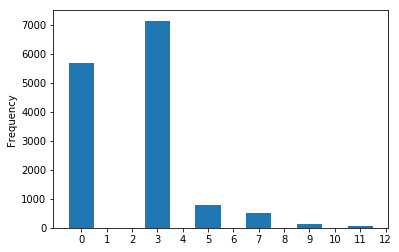

In [20]:
shortest_path_delta_df['path_len'].plot.hist(bins = np.arange(max(shortest_path_delta_df['path_len']))-0.5,
                                             xticks = range(max(shortest_path_delta_df['path_len'])))

In [21]:
max(shortest_path_delta_df['path_len'])

13

In [22]:
shortest_path_delta_df

path     node_1     node_2  \
0                                           [0]    DB02524  BE0001431   
1      [DB11133, BE0000215, DB05187, BE0000071]    DB11133  BE0000071   
2      [DB11133, BE0000071, DB05187, BE0000215]    DB11133  BE0000215   
3      [DB11133, BE0000215, DB03756, BE0005540]    DB11133  BE0005540   
4                                           [0]    DB09217  BE0000262   
...                                         ...        ...        ...   
14347  [BE0004045, DB01785, BE0000776, DB04714]  BE0004045    DB04714   
14348  [DB00753, BE0000218, DB01236, BE0000484]    DB00753  BE0000484   
14349  [BE0003603, DB00280, BE0000092, DB00321]  BE0003603    DB00321   
14350  [DB04410, BE0001739, DB03127, BE0004529]    DB04410  BE0004529   
14351                                       [0]    DB03217  BE0000838   

       path_len  
0             0  
1             3  
2             3  
3             3  
4             0  
...         ...  
14347         3  
14348         3  
14349         3  
14350         3  
14351         0  

[14352 rows x 4 columns]

## Wrong: Extract the pairs beyond the threshold 4

In [44]:
thresholds = [12, 10, 8, 6, 4]

for threshold in thresholds:
    shortest_path_delta_df.loc[shortest_path_delta_df['path_len'] >= threshold].to_csv('negative_samples/negative_samples_thrsh:' +
                                                                                    str(threshold))
    

In [37]:
thresholds = [12, 10, 8, 6, 4]

for threshold in thresholds:
    print(shortest_path_delta_df.loc[shortest_path_delta_df['path_len'] >= threshold])

                                                    path     node_1  \
227    [BE0001274, DB03801, BE0001258, DB01673, BE000...  BE0001274   
229    [BE0001274, DB02122, BE0004139, DB09060, BE000...  BE0001274   
1530   [DB00171, BE0000014, DB08901, BE0003379, DB004...    DB00171   
1772   [BE0001153, DB02813, BE0001584, DB04404, BE000...  BE0001153   
1773   [BE0001153, DB03861, BE0003196, DB01110, BE000...  BE0001153   
...                                                  ...        ...   
11293  [BE0000896, DB01143, BE0000457, DB00811, BE000...  BE0000896   
12078  [BE0001904, DB02968, BE0001655, DB03530, BE000...  BE0001904   
12556  [BE0002377, DB03352, BE0001321, DB04456, BE000...  BE0002377   
13528  [DB00417, BE0001018, DB00415, BE0003379, DB089...    DB00417   
13987  [BE0004112, DB02494, BE0003753, DB07506, BE000...  BE0004112   

          node_2  path_len  
227      DB02122        12  
229      DB03801        12  
1530   BE0001069        12  
1772     DB03861        12  
17

### All Pairs Shortest Path Comparision

In [99]:
all_pairs_shortest_major = nx.floyd_warshall_numpy(drug_target_interactions_major)

In [98]:
nx.__version__

'2.3'

In [96]:
with open ('supplimentary_data/all_pairs_shortest_path_connected_component.pkl', 'wb') as f:
    pkl.dump(all_pairs_shortest_major, f)

In [26]:
with open ('supplimentary_data/all_pairs_shortest_path_connected_component.pkl', 'rb') as f:
    all_pairs_shortest_major = pkl.load(f)

In [27]:
all_pairs_shortest_major.shape

(9186, 9186)

In [28]:
all_pairs_shortest_major_df = pd.DataFrame(all_pairs_shortest_major)
all_pairs_shortest_major_df = all_pairs_shortest_major_df.stack().reset_index()

In [29]:
all_pairs_shortest_major_df

level_0  level_1    0
0               0        0  0.0
1               0        1  6.0
2               0        2  6.0
3               0        3  8.0
4               0        4  7.0
...           ...      ...  ...
84382591     9185     9181  6.0
84382592     9185     9182  6.0
84382593     9185     9183  5.0
84382594     9185     9184  5.0
84382595     9185     9185  0.0

[84382596 rows x 3 columns]

In [30]:
all_pairs_shortest_major_df_dedup = pd.DataFrame(np.sort(all_pairs_shortest_major_df[['level_0', 'level_1']].values, axis=1),
                                           columns = all_pairs_shortest_major_df[['level_0', 'level_1']].columns).drop_duplicates()

In [31]:
all_pairs_shortest_major_df_dedup

level_0  level_1
0               0        0
1               0        1
2               0        2
3               0        3
4               0        4
...           ...      ...
84364222     9183     9184
84364223     9183     9185
84373408     9184     9184
84373409     9184     9185
84382595     9185     9185

[42195891 rows x 2 columns]

In [32]:
all_pairs_shortest_major_df_dedup = pd.merge(all_pairs_shortest_major_df,
                                             all_pairs_shortest_major_df_dedup,
                                             on = ['level_0', 'level_1'], how = 'right')

In [33]:
all_pairs_shortest_major_df = all_pairs_shortest_major_df_dedup

In [35]:
#all_pairs_shortest_major_df.to_csv('supplimentary_data/all_pairs_shortest_major_df', index = False)

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


## Correct: Extract the pairs beyond the threshold 6

### Extracting edges only from the largest connected component

1. Create dataframe of edges.
2. Right join with original dataframe (get only the edges from largest component)
3. Join with the shortest path dataframe
4. Filter out the ones above threshold

## Steps 1 & 2:

In [36]:
#Step 1
drug_target_interactions_major_edges = [[e[0],e[1]] for e in drug_target_interactions_major.edges]

In [37]:
drug_target_interactions_major_df = pd.DataFrame(drug_target_interactions_major_edges)

In [38]:
drug_target_interactions_major_df['edge'] = drug_target_interactions_major_df[0] + '-' + drug_target_interactions_major_df[1]

In [39]:
drug_target_interactions_major_df

0          1               edge
0        DB02524  BE0001431  DB02524-BE0001431
1        DB11133  BE0000071  DB11133-BE0000071
2        DB11133  BE0000215  DB11133-BE0000215
3        DB11133  BE0005540  DB11133-BE0005540
4        DB09217  BE0000262  DB09217-BE0000262
...          ...        ...                ...
14347  BE0004045    DB04714  BE0004045-DB04714
14348    DB00753  BE0000484  DB00753-BE0000484
14349  BE0003603    DB00321  BE0003603-DB00321
14350    DB04410  BE0004529  DB04410-BE0004529
14351    DB03217  BE0000838  DB03217-BE0000838

[14352 rows x 3 columns]

In [40]:
drug_target_interactions['edge'] = drug_target_interactions['drug_id'] + '-' + drug_target_interactions['target_id']

In [41]:
len(drug_target_interactions)

15709

In [42]:
#Step 2
drug_target_interactions_major_df = pd.merge(drug_target_interactions, drug_target_interactions_major_df, on = 'edge', how = 'right')

### Steps 3 & 4:

In [43]:
all_pairs_shortest_major_df = all_pairs_shortest_major_df.rename(columns = {'level_0' : 'node0', 'level_1': 'node1', 0: 'shortest_path'})

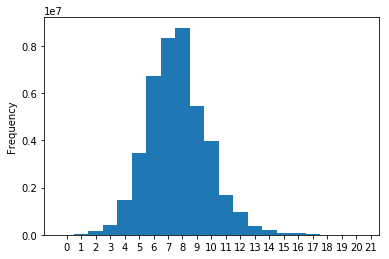

In [44]:
all_pairs_shortest_major_df['shortest_path'].plot.hist(bins = np.arange(max(all_pairs_shortest_major_df['shortest_path']))-0.5,
                                                     xticks = range(22))

In [45]:
max(all_pairs_shortest_major_df['shortest_path'])

22.0

In [46]:
all_pairs_shortest_major_df.head()

node0  node1  shortest_path
0      0      0            0.0
1      0      1            6.0
2      0      2            6.0
3      0      3            8.0
4      0      4            7.0

In [47]:
from multiprocessing import  Pool
from functools import partial
import numpy as np
from tqdm._tqdm_notebook import tqdm_notebook
from sklearn import preprocessing
#tqdm_notebook.pandas()

def parallelize(data, func, num_of_processes=11):
    data_split = np.array_split(data, num_of_processes)
    pool = Pool(num_of_processes)
    data = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

def run_on_subset(func, data_subset):
    return data_subset.apply(func, axis=1)
    #return data_subset.progress_apply(func, axis=1)

def parallelize_on_rows(data, func, num_of_processes=11):
    return parallelize(data, partial(run_on_subset, func), num_of_processes)

#Instead of df.apply(some_func, axis=1)
#Use parallelize_on_rows(df, some_func)

In [48]:
drug_target_interactions_major_nodes = list(drug_target_interactions_major.nodes)

In [49]:
all_pairs_shortest_major_df

node0  node1  shortest_path
0             0      0            0.0
1             0      1            6.0
2             0      2            6.0
3             0      3            8.0
4             0      4            7.0
...         ...    ...            ...
42195886   9183   9184            6.0
42195887   9183   9185            5.0
42195888   9184   9184            0.0
42195889   9184   9185            5.0
42195890   9185   9185            0.0

[42195891 rows x 3 columns]

In [50]:
drug_target_interactions_major_nodes

['DB02524',
 'DB11133',
 'DB09217',
 'DB07536',
 'BE0002707',
 'DB00208',
 'DB03986',
 'DB05785',
 'DB07716',
 'DB07567',
 'DB08584',
 'DB06103',
 'DB03660',
 'DB01003',
 'DB07676',
 'DB08761',
 'DB07786',
 'BE0000779',
 'DB01784',
 'DB04682',
 'BE0003857',
 'BE0000805',
 'DB01078',
 'DB01610',
 'DB04593',
 'DB07029',
 'DB03173',
 'DB04164',
 'DB00983',
 'BE0000774',
 'DB01852',
 'BE0001627',
 'BE0000581',
 'BE0001964',
 'DB08089',
 'BE0001634',
 'DB01955',
 'DB02196',
 'DB02164',
 'BE0002073',
 'BE0002664',
 'DB06414',
 'BE0000614',
 'BE0003046',
 'DB02772',
 'DB01701',
 'DB02296',
 'BE0000199',
 'DB07607',
 'DB00415',
 'DB04348',
 'DB08274',
 'DB02759',
 'DB00350',
 'DB05268',
 'BE0003861',
 'BE0001257',
 'DB02999',
 'BE0005561',
 'DB07506',
 'BE0003549',
 'DB01056',
 'DB08185',
 'DB03683',
 'DB03830',
 'DB08618',
 'DB00744',
 'DB04203',
 'DB04411',
 'DB00619',
 'DB09053',
 'BE0004201',
 'DB07557',
 'DB00354',
 'DB02264',
 'BE0004317',
 'DB02125',
 'DB00707',
 'DB02062',
 'DB02889',


In [53]:
def map_nodeid_nodename(i, axis): return drug_target_interactions_major_nodes[i]

In [54]:
drug_target_interactions_major_nodes = list(drug_target_interactions_major.nodes)
all_pairs_shortest_major_df['node_1'] = parallelize_on_rows(all_pairs_shortest_major_df['node1'], map_nodeid_nodename)
all_pairs_shortest_major_df['node_0'] = parallelize_on_rows(all_pairs_shortest_major_df['node0'], map_nodeid_nodename)

In [55]:
all_pairs_shortest_major_df['edge'] = all_pairs_shortest_major_df['node_0'] + '-' + all_pairs_shortest_major_df['node_1']

In [56]:
all_pairs_shortest_major_df = all_pairs_shortest_major_df.drop(['node1', 'node0'], axis = 1)

In [57]:
all_pairs_shortest_major_df

shortest_path     node_1     node_0                 edge
0                   0.0    DB02524    DB02524      DB02524-DB02524
1                   6.0    DB11133    DB02524      DB02524-DB11133
2                   6.0    DB09217    DB02524      DB02524-DB09217
3                   8.0    DB07536    DB02524      DB02524-DB07536
4                   7.0  BE0002707    DB02524    DB02524-BE0002707
...                 ...        ...        ...                  ...
42195886            6.0    DB00408    DB08568      DB08568-DB00408
42195887            5.0  BE0000484    DB08568    DB08568-BE0000484
42195888            0.0    DB00408    DB00408      DB00408-DB00408
42195889            5.0  BE0000484    DB00408    DB00408-BE0000484
42195890            0.0  BE0000484  BE0000484  BE0000484-BE0000484

[42195891 rows x 4 columns]

In [58]:
# Step 3:

thresholds = [6, 8, 12]

for threshold in thresholds:
    all_pairs_shortest_major_df.loc[all_pairs_shortest_major_df['shortest_path'] >= threshold].to_csv('negative_samples/negative_samples_thrsh:' +
                                                                                    str(threshold))
    

In [144]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [94]:
shortest_path_delta_df

path     node_1     node_2  \
0                                           [0]    DB02524  BE0001431   
1      [DB11133, BE0000215, DB05187, BE0000071]    DB11133  BE0000071   
2      [DB11133, BE0000071, DB05187, BE0000215]    DB11133  BE0000215   
3      [DB11133, BE0000215, DB03756, BE0005540]    DB11133  BE0005540   
4                                           [0]    DB09217  BE0000262   
...                                         ...        ...        ...   
14347  [BE0004045, DB01785, BE0000776, DB04714]  BE0004045    DB04714   
14348  [DB00753, BE0000218, DB01236, BE0000484]    DB00753  BE0000484   
14349  [BE0003603, DB00280, BE0000092, DB00321]  BE0003603    DB00321   
14350  [DB04410, BE0001739, DB03127, BE0004529]    DB04410  BE0004529   
14351                                       [0]    DB03217  BE0000838   

       path_len  
0             0  
1             3  
2             3  
3             3  
4             0  
...         ...  
14347         3  
14348         3  
14349         3  
14350         3  
14351         0  

[14352 rows x 4 columns]

In [59]:
seaborn_plot_df = pd.DataFrame()
seaborn_plot_df['all_shortest_path']  = all_pairs_shortest_major_df.groupby(['shortest_path'])\
                                        .count()['node_0']/sum(all_pairs_shortest_major_df['shortest_path'])
seaborn_plot_df['long_shortest_path'] = shortest_path_delta_df.groupby(['path_len']).count()\
                                        ['node_1']/sum(shortest_path_delta_df['path_len'])

seaborn_plot_df = seaborn_plot_df.fillna(0)


In [60]:
from matplotlib.colors import ListedColormap

ax = seaborn_plot_df.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("coolwarm", 10)), 
          figsize=(12,6))


ax.set_ylabel("PDF")

Text(0, 0.5, 'PDF')

In [83]:
seaborn_plot_df

all_shortest_path  long_shortest_path
shortest_path                                       
0.0                 2.841734e-05            0.183500
1.0                 4.439862e-05            0.000000
2.0                 5.248763e-04            0.000000
3.0                 1.229138e-03            0.230164
4.0                 4.525398e-03            0.000000
5.0                 1.076839e-02            0.025427
6.0                 2.081442e-02            0.000000
7.0                 2.570860e-02            0.016597
8.0                 2.711728e-02            0.000000
9.0                 1.685735e-02            0.004737
10.0                1.233022e-02            0.000000
11.0                5.186994e-03            0.001837
12.0                3.031242e-03            0.000000
13.0                1.127608e-03            0.000258
14.0                6.624433e-04            0.000000
15.0                2.817574e-04            0.000000
16.0                2.096034e-04            0.000000
17.0                5.057025e-05            0.000000
18.0                2.748928e-05            0.000000
19.0                5.852995e-06            0.000000
20.0                2.425343e-06            0.000000
21.0                5.259034e-07            0.000000
22.0                6.187098e-08            0.000000

In [93]:
#bins = np.linspace(0, max(seaborn_plot_df['long_shortest_path']))

plt.figure(figsize = (15,7))
plt.bar(seaborn_plot_df.index, 
        list(seaborn_plot_df['all_shortest_path']), alpha=0.5, label='all_shortest_path')
plt.bar(seaborn_plot_df.index, 
         list(seaborn_plot_df['long_shortest_path']), alpha=0.5, label='long_shortest_path')

plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.xticks(np.arange(0, len(seaborn_plot_df['all_shortest_path']), 1.0))
plt.show()

In [91]:
np.arange(0, max(seaborn_plot_df['all_shortest_path']), 1.0)

array([0.])

In [92]:
max(seaborn_plot_df['all_shortest_path'])

0.02711728458403102

In [110]:
all_pairs_shortest_major_df

shortest_path     node_1     node_0                 edge
0                   0.0    DB02524    DB02524      DB02524-DB02524
1                   6.0    DB11133    DB02524      DB02524-DB11133
2                   6.0    DB09217    DB02524      DB02524-DB09217
3                   8.0    DB07536    DB02524      DB02524-DB07536
4                   7.0  BE0002707    DB02524    DB02524-BE0002707
...                 ...        ...        ...                  ...
42195886            6.0    DB00408    DB08568      DB08568-DB00408
42195887            5.0  BE0000484    DB08568    DB08568-BE0000484
42195888            0.0    DB00408    DB00408      DB00408-DB00408
42195889            5.0  BE0000484    DB00408    DB00408-BE0000484
42195890            0.0  BE0000484  BE0000484  BE0000484-BE0000484

[42195891 rows x 4 columns]

In [113]:
final_df = all_pairs_shortest_major_df = all_pairs_shortest_major_df[(all_pairs_shortest_major_df['shortest_path'] > 12) 
                           &(all_pairs_shortest_major_df['node_0'].str.contains('DB'))
                           & (all_pairs_shortest_major_df['node_1'].str.contains('BE'))]

In [114]:
final_df

shortest_path     node_1   node_0               edge
794                13.0  BE0002423  DB02524  DB02524-BE0002423
1299               13.0  BE0004814  DB02524  DB02524-BE0004814
2651               15.0  BE0000954  DB02524  DB02524-BE0000954
2787               13.0  BE0003441  DB02524  DB02524-BE0003441
3137               13.0  BE0004370  DB02524  DB02524-BE0004370
...                 ...        ...      ...                ...
42194724           13.0  BE0001904  DB04714  DB04714-BE0001904
42194991           13.0  BE0001904  DB02113  DB02113-BE0001904
42195408           13.0  BE0001438  DB01847  DB01847-BE0001438
42195416           13.0  BE0001005  DB01847  DB01847-BE0001005
42195425           13.0  BE0000484  DB01847  DB01847-BE0000484

[231117 rows x 4 columns]

In [116]:
len(drug_target_interactions_major_df)

14352